## Rede neural artificial - Classificador XoR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Base de dados :

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

Y = np.array([0, 1, 1, 0])

print('Dimensão de X:', X.shape)
print('')
print('Dimensão de Y:', Y.shape)

Dimensão de X: (4, 2)

Dimensão de Y: (4,)


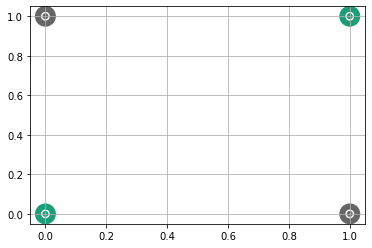

In [3]:
plt.scatter(X[:,0], X[:,1], c = Y, cmap = 'Dark2', marker = 'o', linewidths = 15)

plt.grid()

## Desenvolvimento da RNA :

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
model = Sequential()

#model.add(Dense(units=2,activation='relu'))
model.add(Dense(units=2,activation='sigmoid'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [6]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


## Treinamento do modelo :

<AxesSubplot:>

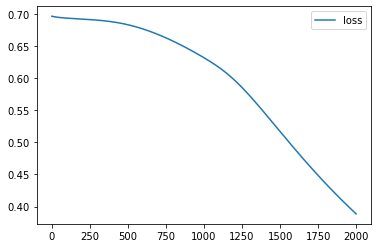

In [7]:
model.fit(X, Y, epochs = 2000, verbose = 0)

model_loss = pd.DataFrame(model.history.history)

model_loss.plot()


### Validação do modelo :

In [8]:
#Estimativa de uma das entradas do XoR

entrada = [[1,0]]

prediction = (model.predict(entrada) > 0.5).astype("int32")

print('O valor do XoR para a entrada', entrada[0], 'é:', prediction[0][0])

1/1 [==============================] - 0s 111ms/step
O valor do XoR para a entrada [1, 0] é: 1


In [9]:
#Estimativa de todas as entradas do XoR

predictions = (model.predict(X) > 0.5).astype("int32")

predictions

1/1 [==============================] - 0s 22ms/step


array([[0],
       [1],
       [1],
       [0]], dtype=int32)

In [10]:
from sklearn.metrics import classification_report

In [11]:
print(classification_report(Y,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [12]:
model.weights[0].numpy()

array([[-4.1534505, -2.9891438],
       [ 3.9063146,  2.0983346]], dtype=float32)

In [13]:
model.weights[1].numpy()

array([ 2.4774835, -1.1701221], dtype=float32)

In [14]:
model.weights[2].numpy()

array([[-2.9631464],
       [ 2.7773294]], dtype=float32)

In [15]:
model.weights[3].numpy()

array([1.4498696], dtype=float32)